<a 
href="https://colab.research.google.com/github/adilo231/Python-for-machine-learning/blob/main/Exercices Global/Germany_cars_price_prediction.ipynb" 
target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

import warnings

warnings.filterwarnings("ignore")

# load Data

In [33]:
df = pd.read_csv('Datasets/autoscout24-germany-dataset.csv')
df.head(10)

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011
5,147000,Toyota,Auris,Electric/Gasoline,Automatic,Used,6950,99.0,2011
6,91894,Renault,Scenic,Diesel,Manual,Used,6970,131.0,2011
7,127500,Opel,Zafira,Gasoline,Manual,Used,6972,116.0,2011
8,115000,Mazda,3,Gasoline,Automatic,Used,6980,150.0,2011
9,104,Ford,Transit,Diesel,Manual,Used,6990,86.0,2011


# Data Analysis
- 9 Columns and 46405 row
- Columns :
 -  5 Categorical Features  'make', 'model', 'fuel', 'gear', 'offerType'
 -  4 Numerical Features
- Target Columns price
- There are 354 nan Values approximatly 0.76% of the data
- There are 2124 duplicant rows


In [34]:
df.columns

Index(['mileage', 'make', 'model', 'fuel', 'gear', 'offerType', 'price', 'hp',
       'year'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46405 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    46405 non-null  int64  
 1   make       46405 non-null  object 
 2   model      46262 non-null  object 
 3   fuel       46405 non-null  object 
 4   gear       46223 non-null  object 
 5   offerType  46405 non-null  object 
 6   price      46405 non-null  int64  
 7   hp         46376 non-null  float64
 8   year       46405 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.2+ MB


In [7]:
df.describe()

,mileage,price,hp,year
count,4.640500e+04,4.640500e+04,46376.000000,46405.000000
mean,7.117786e+04,1.657234e+04,132.990987,2016.012951
std,6.262531e+04,1.930470e+04,75.449284,3.155214
min,0.000000e+00,1.100000e+03,1.000000,2011.000000
25%,1.980000e+04,7.490000e+03,86.000000,2013.000000
50%,6.000000e+04,1.099900e+04,116.000000,2016.000000
75%,1.050000e+05,1.949000e+04,150.000000,2019.000000
max,1.111111e+06,1.199900e+06,850.000000,2021.000000


In [37]:
(df.isnull().sum()).sum()/df.shape[0]*100

0.7628488309449413

In [17]:
df.duplicated().sum()

2124

In [40]:
df['offerType'].value_counts()

Used              39822
Pre-registered     2768
Demonstration      2351
Employee's car     1117
New                  13
Name: offerType, dtype: int64

In [41]:
df['fuel'].value_counts()

Gasoline             28720
Diesel               15178
Electric/Gasoline     1146
Electric               661
LPG                    125
CNG                    116
Electric/Diesel         53
Others                  47
-/- (Fuel)              22
Ethanol                  2
Hydrogen                 1
Name: fuel, dtype: int64

# Data Cleaning

## Delete Mising valeus

In [38]:
df =df.dropna()
print(df.shape,(df.isnull().sum()/df.shape[0])*100)

(46071, 9) mileage      0.0
make         0.0
model        0.0
fuel         0.0
gear         0.0
offerType    0.0
price        0.0
hp           0.0
year         0.0
dtype: float64


# Eleminate Duplicant rows

In [42]:
df[df.duplicated()]

,mileage,make,model,fuel,gear,offerType,price,hp,year
198,15,Fiat,Panda,Electric/Gasoline,Manual,Pre-registered,10980,69.0,2021
201,9,Toyota,Aygo,Gasoline,Manual,Pre-registered,11490,72.0,2021
202,9,Toyota,Aygo,Gasoline,Manual,Pre-registered,11490,72.0,2021
207,10,Toyota,Aygo,Gasoline,Manual,Pre-registered,11990,72.0,2021
208,10,Toyota,Aygo,Gasoline,Manual,Pre-registered,11990,72.0,2021
...,...,...,...,...,...,...,...,...,...
46400,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46401,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46402,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46403,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021


In [43]:
df =df.drop_duplicates(keep='first')

In [44]:
df.shape

(43947, 9)

# Feature Engineering
## Create Age Columns

In [53]:
from datetime import datetime


df['age']=datetime.now().year-df['year']

In [54]:
df.head(5)

,mileage,make,model,fuel,gear,offerType,price,hp,year,age
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011,11
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011,11
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011,11
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011,11
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011,11


## Reduce the Fuel type

In [46]:


df['fuel'] = df['fuel'].replace(['Electric/Gasoline', 'Electric/Diesel'],  'Hybride')
df['fuel'] = df['fuel'].replace(['CNG', 'LPG', 'Others', '-/- (Fuel)', 'Ethanol', 'Hydrogen'], 'Others')

In [47]:
df['fuel'].value_counts()

Gasoline    27246
Diesel      14684
Hybride      1088
Electric      639
Others        290
Name: fuel, dtype: int64

# Check redondent markes

In [48]:
df['make'].unique()

array(['BMW', 'Volkswagen', 'SEAT', 'Renault', 'Peugeot', 'Toyota',
       'Opel', 'Mazda', 'Ford', 'Mercedes-Benz', 'Chevrolet', 'Audi',
       'Fiat', 'Kia', 'Dacia', 'MINI', 'Hyundai', 'Skoda', 'Citroen',
       'Infiniti', 'Suzuki', 'SsangYong', 'smart', 'Cupra', 'Volvo',
       'Jaguar', 'Porsche', 'Nissan', 'Honda', 'Mitsubishi', 'Lexus',
       'Jeep', 'Maserati', 'Bentley', 'Land', 'Alfa', 'Subaru', 'Dodge',
       'Microcar', 'Lamborghini', 'Lada', 'Tesla', 'Chrysler', 'McLaren',
       'Aston', 'Rolls-Royce', 'Lancia', 'Abarth', 'DS', 'Daihatsu',
       'Ligier', 'Ferrari', 'Aixam', 'Zhidou', 'Morgan', 'Maybach', 'RAM',
       'Alpina', 'Polestar', 'Brilliance', 'Piaggio', 'FISKER', 'Others',
       'Cadillac', 'Iveco', 'Isuzu', 'Corvette', 'Baic', 'DFSK',
       'Estrima', 'Alpine'], dtype=object)

In [50]:
df['gear'].unique()

array(['Manual', 'Automatic', 'Semi-automatic'], dtype=object)

In [52]:
df.columns

Index(['mileage', 'make', 'model', 'fuel', 'gear', 'offerType', 'price', 'hp',
       'year'],
      dtype='object')

# Data Exploratory Analysis DEA

In [56]:
Target = 'price'
Cat_col = [ 'make', 'model', 'fuel', 'gear', 'offerType']
Num_col = ['mileage', 'hp','year','age']

Text(0, 0.5, 'Price')

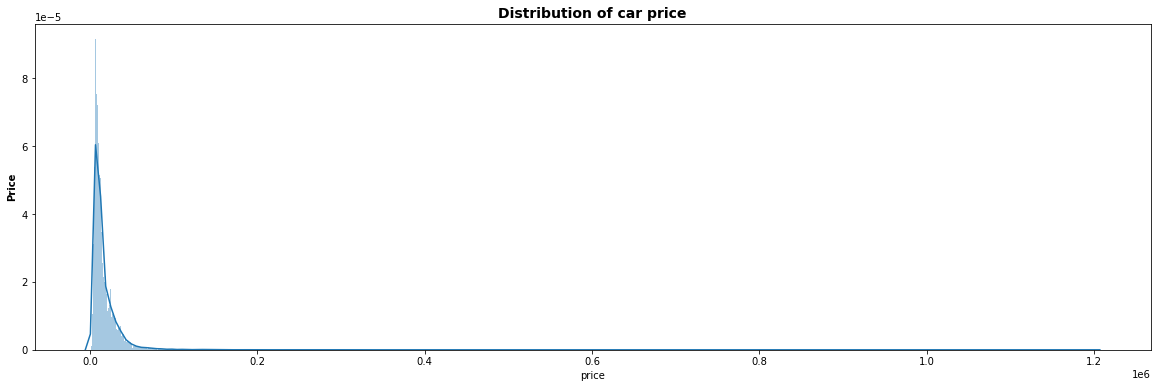

In [88]:
plt.figure(figsize=(20,6))
sns.distplot(df[Target],bins=1000)
plt.title('Distribution of car price', fontsize =14, fontweight = 'bold')
plt.ylabel('Price',fontweight='bold')


Text(0.5, 0, 'Fuel Type')

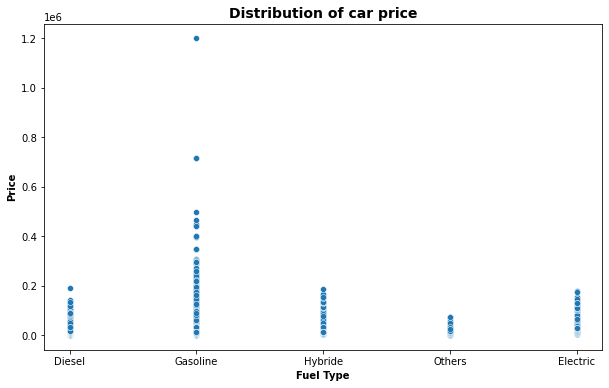

In [96]:
plt.figure(figsize=(10,6))
sns.scatterplot(df['fuel'],df[Target])
plt.title('Distribution of car price', fontsize =14, fontweight = 'bold')
plt.ylabel('Price',fontweight='bold')
plt.xlabel('Fuel Type',fontweight='bold')

Text(0.5, 0, 'Fuel Type')

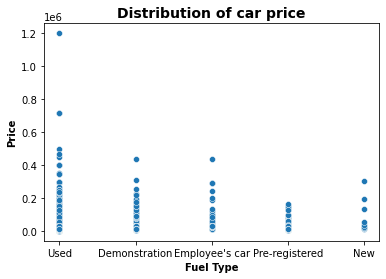

In [97]:


sns.scatterplot(df['offerType'],df[Target])
plt.title('Distribution of car price', fontsize =14, fontweight = 'bold')
plt.ylabel('Price',fontweight='bold')
plt.xlabel('Fuel Type',fontweight='bold')

In [109]:
df['offerType'].unique()

array(['Used', 'Demonstration', "Employee's car", 'Pre-registered', 'New'],
      dtype=object)

Text(0.5, 1.0, 'Distribution of car price')

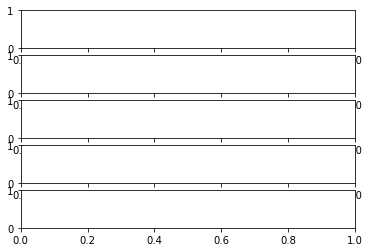

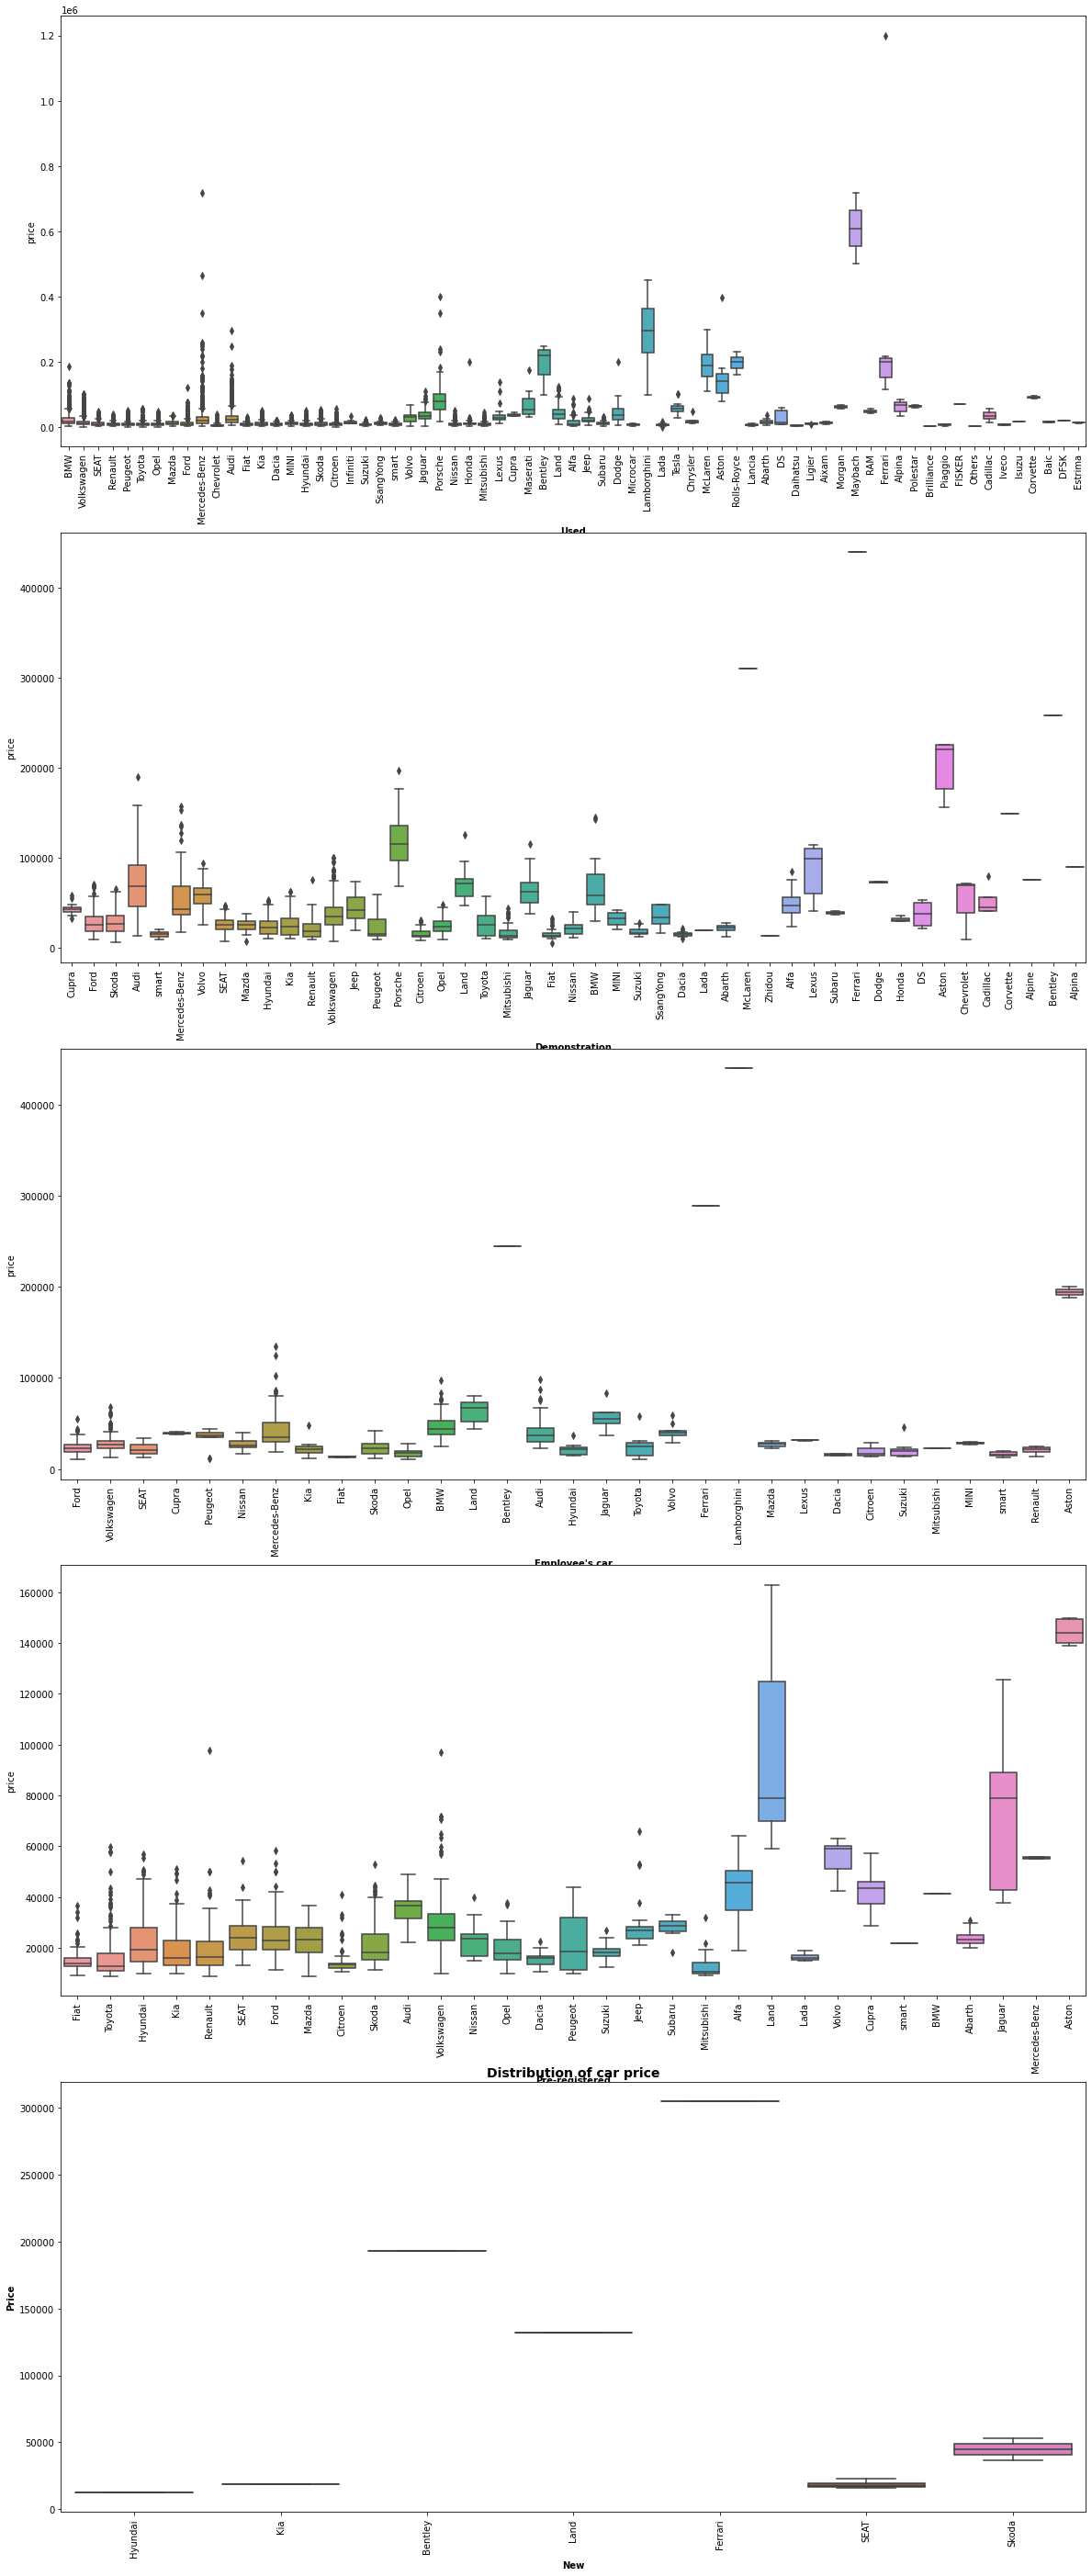

In [120]:

Nbr= df['offerType'].unique().shape[0]

plt.subplots(Nbr,1)
plt.figure(figsize=(20,10*Nbr))
for i, type in zip(range(0,Nbr),df['offerType'].unique()):
    plt.subplot(Nbr,1,i+1)
    sns.boxplot(df['make'][df['offerType']==type],df[Target])
    plt.xticks(rotation = 90)
    plt.xlabel(type,fontweight='bold')
plt.ylabel('Price',fontweight='bold')
plt.title('Distribution of car price', fontsize =14, fontweight = 'bold')

Text(0, 0.5, 'nombre')

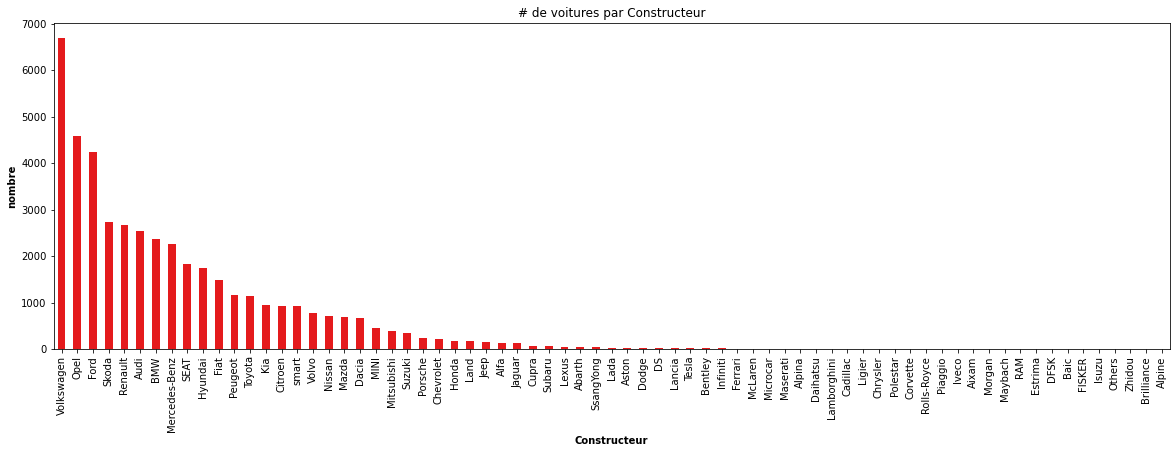

In [91]:
plt.figure(figsize=(20,6))
ax=df['make'].value_counts().plot(kind='bar',stacked=True, colormap = 'Set1')
ax.title.set_text('# de voitures par Constructeur')
plt.xlabel("Constructeur",fontweight = 'bold')
plt.ylabel("nombre",fontweight = 'bold')

Text(0, 0.5, 'Fuel Type')

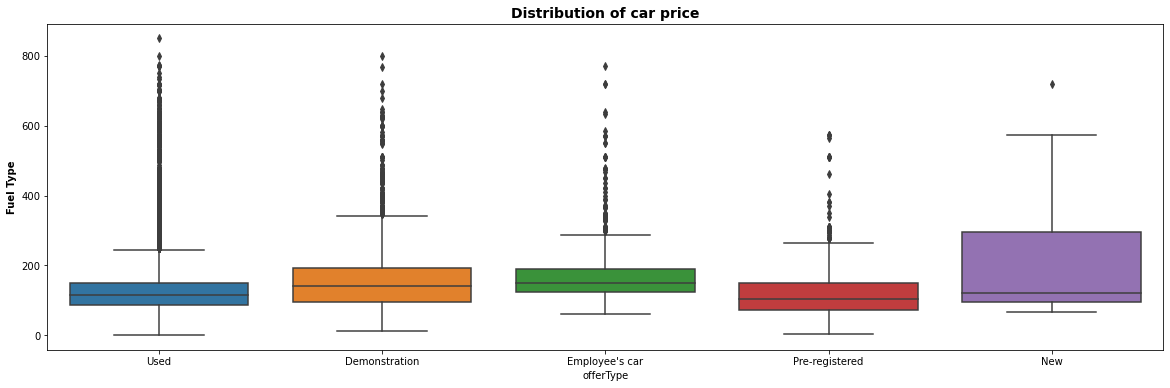

In [95]:
plt.figure(figsize=(20,6))
sns.boxplot(df['offerType'],df['hp'])
plt.title('Distribution of car price', fontsize =14, fontweight = 'bold')
plt.ylabel('House power',fontweight='bold')
plt.ylabel('Fuel Type',fontweight='bold')

Text(0.5, 1.0, 'Car Company Name vs Average Price')

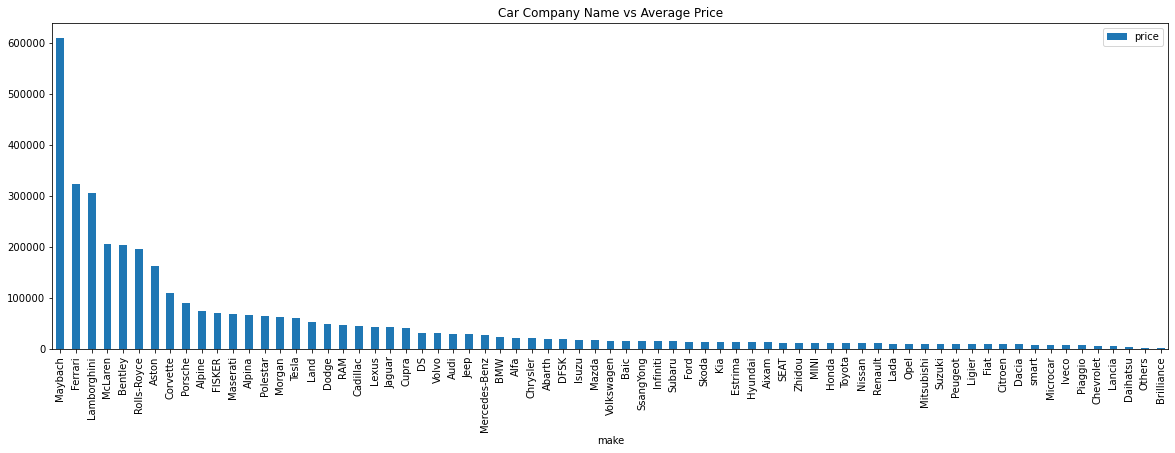

In [127]:

df_autox = pd.DataFrame(df.groupby(['make'])['price'].mean().sort_values(ascending = False))

df_autox.plot.bar(figsize=(20, 6))
plt.title('Car Company Name vs Average Price')

In [128]:
Num_col

['mileage', 'hp', 'year', 'age']

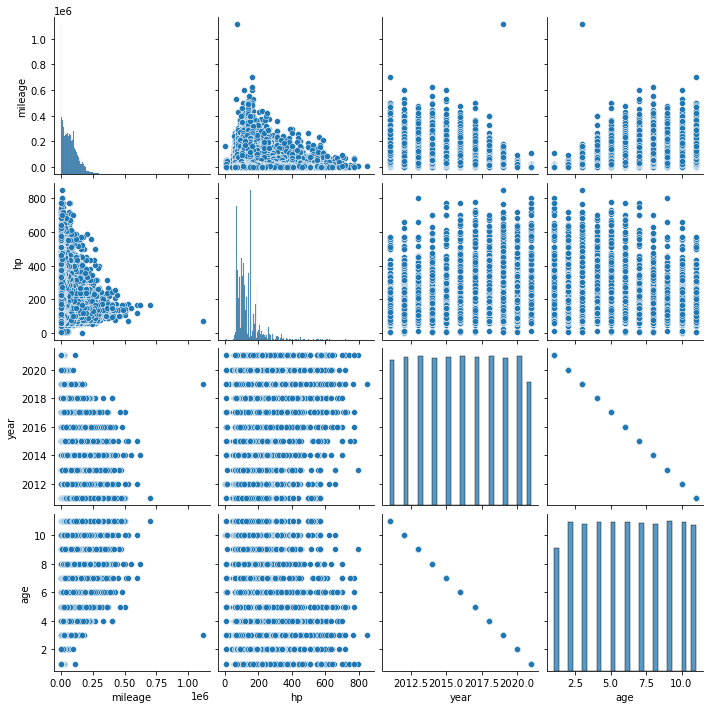

In [129]:
sns.pairplot(df[Num_col])

<AxesSubplot:xlabel='mileage', ylabel='Density'>

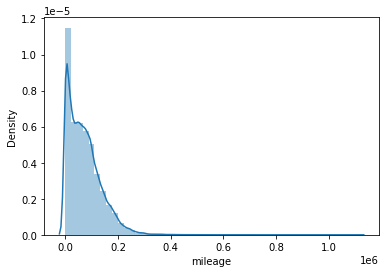

In [130]:
sns.distplot(df['mileage'])

<AxesSubplot:xlabel='age', ylabel='Density'>

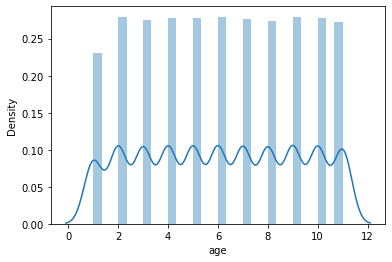

In [132]:
sns.distplot(df['age'])

<AxesSubplot:xlabel='hp', ylabel='Density'>

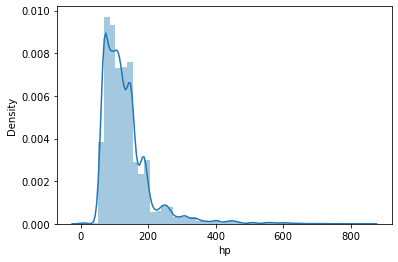

In [133]:
sns.distplot(df['hp'])

In [148]:
print(df[df['hp']<100].shape[0]/df.shape[0]*100)
print(df[df['hp']>=100][df['hp']<200].shape[0]/df.shape[0]*100)
print(df[df['hp']>=200][df['hp']<300].shape[0]/df.shape[0]*100)
print(df[df['hp']>=300][df['hp']<400].shape[0]/df.shape[0]*100)
print(df[df['hp']>=400].shape[0]/df.shape[0]*100)

35.374428288620386
53.971829703961596
6.737661273807086
2.209479600427788
1.7066011331831523


Text(0.5, 0, 'House power')

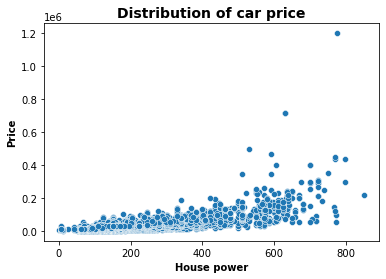

In [149]:

sns.scatterplot(df['hp'],df[Target])
plt.title('Distribution of car price', fontsize =14, fontweight = 'bold')
plt.ylabel('Price',fontweight='bold')
plt.xlabel('House power',fontweight='bold')

Text(0.5, 0, 'House power')

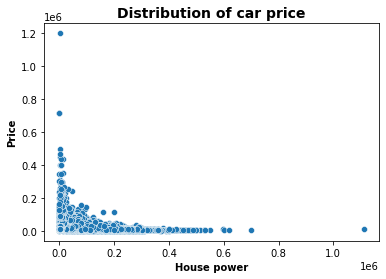

In [150]:
sns.scatterplot(df['mileage'],df[Target])
plt.title('Distribution of car price', fontsize =14, fontweight = 'bold')
plt.ylabel('Price',fontweight='bold')
plt.xlabel('House power',fontweight='bold')

In [155]:
df.sort_values(by=['mileage','hp','price']).head(100)

,mileage,make,model,fuel,gear,offerType,price,hp,year,age
19433,0,Renault,Twingo,Gasoline,Manual,Pre-registered,10299,65.0,2021,1
19442,0,Renault,Twingo,Gasoline,Manual,Demonstration,10668,65.0,2021,1
19447,0,Renault,Twingo,Gasoline,Manual,Pre-registered,10799,65.0,2021,1
17558,0,Hyundai,i10,Gasoline,Manual,Pre-registered,11980,67.0,2021,1
5054,0,Hyundai,i10,Gasoline,Manual,New,12579,67.0,2021,1
...,...,...,...,...,...,...,...,...,...,...
25759,1,Ford,Kuga,Gasoline,Manual,Pre-registered,27790,150.0,2020,2
46264,1,Cupra,Formentor,Gasoline,Manual,Pre-registered,28784,150.0,2021,1
33442,1,Volkswagen,Tiguan,Gasoline,Automatic,Pre-registered,35650,150.0,2021,1
21541,1,Hyundai,i30,Gasoline,Manual,Pre-registered,19195,160.0,2021,1


# Data preprocessing

In [167]:
Num_col=['mileage', 'hp', 'age']

In [256]:
X=df.drop(['year','price'],1)
y=df['price']

In [210]:
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

In [226]:
numerical_pipline = make_pipeline(SimpleImputer(), StandardScaler())
categorical_pipline = make_pipeline(SimpleImputer(strategy='most_frequent'), OrdinalEncoder())

## Onhot encoder

In [257]:
numerical_pipline = make_pipeline(SimpleImputer(), StandardScaler())
categorical_pipline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())

In [230]:
preprocessor = make_column_transformer((numerical_pipline, Num_col),
                                      (categorical_pipline, Cat_col))
                                      


In [228]:
X_transformed=pd.DataFrame(preprocessor.fit_transform(X),columns = Num_col+Cat_col)

In [258]:
X_transformed =preprocessor.fit_transform(X)

In [259]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_transformed, y, test_size= 0.2, random_state= 0)
print("Number transactions x_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions x_test dataset: ", x_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions x_train dataset:  (35157, 922)
Number transactions y_train dataset:  (35157,)
Number transactions x_test dataset:  (8790, 922)
Number transactions y_test dataset:  (8790,)


In [208]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [240]:
lr = LinearRegression()

lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
score = r2_score(y_test.values, y_pred)
score

0.8807406977899616

### Linear Regression PolyFeatures

In [234]:
from sklearn.preprocessing import PolynomialFeatures

In [236]:

X_poly = PolynomialFeatures(2).fit_transform(x_train)
lr = LinearRegression()
lr.fit(X_poly, y_train)

X_poly = PolynomialFeatures(2).fit_transform(x_test)
y_pred = lr.predict(X_poly)
score = r2_score(y_test.values, y_pred)

In [334]:
score

0.8807406977899616

Text(0, 0.5, 'y_pred')

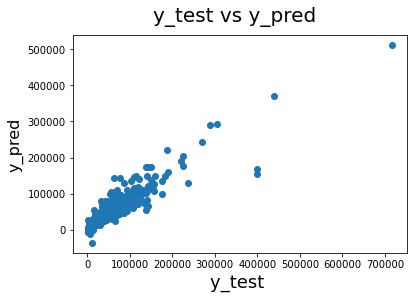

In [241]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)   
plt.xlabel('y_test ', fontsize=18)                       
plt.ylabel('y_pred', fontsize=16)  

In [263]:
d=pd.DataFrame()


In [269]:
E=0

V=0
for u,v in zip(y_test.values,y_pred):
    E=(u-v)
    
    V= (u-v)*(u-v)
    print(u,v, np.abs(u-v))

E=E/y_test.shape[0]

V=V/y_test.shape[0]

9240 10211.684032656995 971.6840326569945
6990 3762.8073213632524 3227.1926786367476
21900 25010.52068924736 3110.5206892473616
18199 21615.850587362693 3416.8505873626927
19750 15918.430621023068 3831.569378976932
2799 -371.08079340511904 3170.080793405119
139500 107209.89635070019 32290.10364929981
24950 25955.889411631928 1005.8894116319279
8990 8695.345267698387 294.65473230161297
4490 2948.5135347153264 1541.4864652846736
7230 4381.621098514239 2848.378901485761
23850 28497.743877452056 4647.743877452056
14990 17260.880173120426 2270.8801731204258
3000 -2165.7312114625965 5165.731211462597
7899 10399.814359090593 2500.814359090593
5090 4121.512924035633 968.4870759643672
5700 1724.610139004406 3975.389860995594
8950 10880.412754294473 1930.4127542944734
23943 20944.468154915357 2998.5318450846426
8999 9921.45262844718 922.4526284471794
31350 26180.421253512897 5169.578746487103
3999 -2133.4578707605906 6132.457870760591
46994 42517.26219441666 4476.73780558334
16870 17705.80440572

In [270]:
print(E,V)

-0.7594043916765152 0.7594043916765152 5069.1493145577115


In [305]:
Num_col = ['mileage', 'hp', 'age','price']
Cat_col =['fuel', 'gear', 'offerType']

In [306]:
numerical_pipline = make_pipeline(SimpleImputer(), StandardScaler())
categorical_pipline = make_pipeline(SimpleImputer(strategy='most_frequent'), OrdinalEncoder())

In [307]:
preprocessor = make_column_transformer((numerical_pipline, Num_col),
                                      (categorical_pipline, Cat_col))

In [308]:
df_transformed=pd.DataFrame(preprocessor.fit_transform(df),columns = Num_col+Cat_col)
df_transformed

,mileage,hp,age,price,fuel,gear,offerType
0,2.616704,-0.234841,1.580542,-0.501197,0.0,1.0,4.0
1,0.329525,-0.154893,1.580542,-0.497237,2.0,1.0,4.0
2,1.238284,0.351443,1.580542,-0.496054,2.0,1.0,4.0
3,0.384211,-0.314789,1.580542,-0.493483,2.0,1.0,4.0
4,1.346049,0.298144,1.580542,-0.493483,2.0,1.0,4.0
...,...,...,...,...,...,...,...
43942,-1.162932,-0.821124,-1.624548,-0.216314,2.0,1.0,3.0
43943,-1.161501,-0.834449,-1.624548,-0.208600,3.0,1.0,3.0
43944,-1.154247,-0.861098,-1.624548,-0.192402,3.0,1.0,0.0
43945,-1.149631,-0.861098,-1.624548,-0.192402,3.0,1.0,0.0


In [309]:
df_train, df_test= train_test_split(df_transformed, test_size= 0.2, random_state= 0)
print("Number transactions x_train dataset: ", df_train.shape)

print("Number transactions x_test dataset: ", df_test.shape)


Number transactions x_train dataset:  (35157, 7)
Number transactions x_test dataset:  (8790, 7)


In [310]:
X_train = df_train.drop(['price'],1)
y_train= df_train['price']

In [311]:
x_train

,mileage,hp,age,fuel,gear,offerType
26371,-0.026838,-0.461360,0.939524,2.0,1.0,4.0
26852,-0.468013,0.218197,-0.342512,0.0,0.0,4.0
22628,-0.416253,-0.861098,0.939524,2.0,1.0,4.0
32092,0.223819,-0.861098,1.580542,2.0,1.0,4.0
1215,-0.278460,-0.861098,1.260033,2.0,1.0,4.0
...,...,...,...,...,...,...
30403,-0.535808,-0.687878,0.298506,2.0,1.0,4.0
21243,-0.054052,0.671234,0.298506,0.0,0.0,4.0
42613,-1.159040,-0.581281,-1.304039,2.0,1.0,4.0
43567,-1.134946,-0.434710,-1.624548,2.0,0.0,4.0


In [312]:
import statsmodels.api as sm
X_train_1 = x_train['hp']
# Add a constant
X_train_1c = sm.add_constant(X_train_1)
print(X_train_1c.shape,y_train.shape)
# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_1c).fit()

lr_1.params

(35157, 2) (35157,)


const   -0.001481
hp       0.739061
dtype: float64

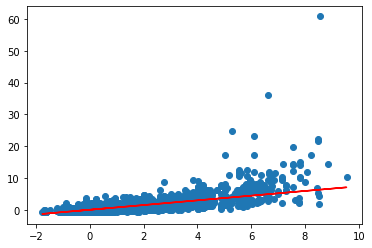

In [314]:
plt.scatter(X_train_1c.iloc[:, 1], y_train)
plt.plot(X_train_1c.iloc[:, 1], 0.739061*X_train_1c.iloc[:, 1]-0.00114, 'r')
plt.show()

In [315]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                 4.381e+04
Date:                Sun, 30 Oct 2022   Prob (F-statistic):               0.00
Time:                        09:01:26   Log-Likelihood:                -35372.
No. Observations:               35157   AIC:                         7.075e+04
Df Residuals:                   35155   BIC:                         7.077e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0015      0.004     -0.420      0.6

In [322]:
X_train_2 = x_train[['hp', 'mileage']]
# Add a constant
X_train_2c = sm.add_constant(X_train_2)

# Create a second fitted model
lr_2 = sm.OLS(y_train, X_train_2c).fit()

In [317]:
lr_2.params

const     -0.001285
hp         0.732522
mileage   -0.287291
dtype: float64

In [319]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                 3.104e+04
Date:                Sun, 30 Oct 2022   Prob (F-statistic):               0.00
Time:                        09:02:50   Log-Likelihood:                -31712.
No. Observations:               35157   AIC:                         6.343e+04
Df Residuals:                   35154   BIC:                         6.345e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0013      0.003     -0.404      0.6

In [323]:
X_train_3 = x_train[['hp', 'mileage','age']]
# Add a constant
X_train_3c = sm.add_constant(X_train_3)

# Create a second fitted model
lr_3 = sm.OLS(y_train, X_train_3c).fit()

In [325]:
print(lr_3.params)
print(lr_3.summary())

const     -0.001499
hp         0.706992
mileage   -0.182920
age       -0.156186
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                 2.190e+04
Date:                Sun, 30 Oct 2022   Prob (F-statistic):               0.00
Time:                        09:04:44   Log-Likelihood:                -31072.
No. Observations:               35157   AIC:                         6.215e+04
Df Residuals:                   35153   BIC:                         6.219e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [326]:
X_train_f = x_train
# Add a constant
X_train_fc = sm.add_constant(X_train_f)

# Create a second fitted model
lr_f = sm.OLS(y_train, X_train_fc).fit()

In [328]:
print(lr_f.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                 1.110e+04
Date:                Sun, 30 Oct 2022   Prob (F-statistic):               0.00
Time:                        09:06:43   Log-Likelihood:                -30914.
No. Observations:               35157   AIC:                         6.184e+04
Df Residuals:                   35150   BIC:                         6.190e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2413      0.015     15.958      0.0

In [329]:
y_test = df_test.pop('price')
X_test = df_test

In [330]:
X_test_1 = sm.add_constant(X_test)

X_test_new = X_test_1[X_train_fc.columns]

In [331]:
y_pred = lr_f.predict(X_test_new)

Text(0, 0.5, 'y_pred')

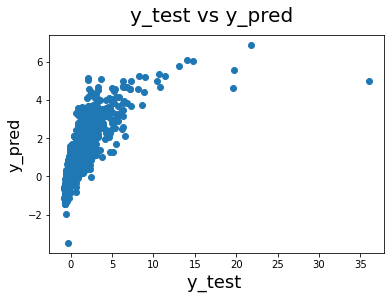

In [332]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)   
plt.xlabel('y_test ', fontsize=18)                       
plt.ylabel('y_pred', fontsize=16)   

In [333]:
r2_score( y_pred,y_test)

0.43841512970523255